## Machine Learning Online Class 
##  Exercise 7 Part 2 | Principal Component Analysis
Requires : scipy, scikit-learn

### Introduction

In this exercise, we will use principal component analysis (PCA) to perform dimensionality reduction. <br>
We will first experiment with an example 2D dataset to get intuition on how PCA works, and then use it on a bigger
dataset of 5000 face image dataset.

### Python Imports

In [1]:
import time

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.io import loadmat
from scipy.ndimage import imread
from scipy.linalg import svd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline

### Part 1 : Load Example Dataset

In [2]:
data = loadmat('ex7data1.mat')
X = data['X']

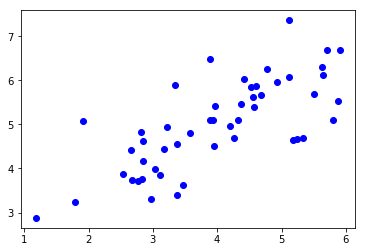

In [3]:
# Visualize the example dataset
plt.plot(X[:,0],X[:,1],'bo')

### Part 2 : Principal Component Analysis

PCA consists of two computational steps: First, we compute the covariance matrix of the data.<br>
Then, we compute the eigenvectors $U_1, U2, \dotsc ,U_n$.<br>
These will correspond to the principal components of variation in the data.<br><br>

Before using PCA, it is important to first normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range. <br><br>

After normalizing the data, we can run PCA to compute the principal components. You task is to complete the code in pca.m to compute the principal components of the dataset. 

In [4]:
# Before running PCA, it is important to first normalize X
mu = np.mean(X, axis = 0)
sigma = np.std(X, axis = 0)
X_norm  = (X - mu) / sigma

In [5]:
# Run PCA

# Compute covariance matrix (biased estimator )
covMat = np.cov(X_norm.T, bias=True)

# Compute eignevectors and eigenvalues (U = eigenvectors, V = eigenvalues)
(U, S, _) = svd(covMat)

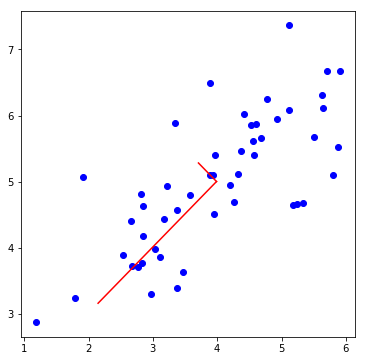

In [6]:
# Draw eigenvectors centered at mean of the data
fig = plt.figure(figsize=(6,6))
plt.plot(X[:,0],X[:,1],'bo')
plt.plot([mu[0], mu[0] + 1.5 * S[0] * U[0,0]], [mu[1], mu[1] + 1.5 * S[0] * U[1,0]],'r-')
plt.plot([mu[0], mu[0] + 1.5 * S[1] * U[0,1]], [mu[1], mu[1] + 1.5 * S[1] * U[1,1]],'r-')


### Part 3: Dimension Reduction
We now implement the projection step to map the data onto the 
first k eigenvectors. <br> 
The code will then plot the data in this reduced dimensional space.  This will show what the data looks like.

In [7]:
# Project the data onto k-th dimension dimension
def projectData(X, U, k):
    return X.dot(U[:,0:k])    

In [8]:
# Recover projected data into the original space
def recoverData(Z, U, k):
    return Z.dot(U[:,0:k].T)

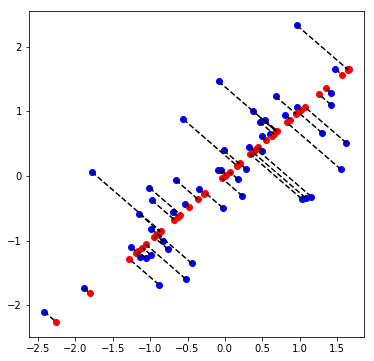

In [9]:
# Plot normalized dataset
fig = plt.figure(figsize=(6,6))
plt.plot(X_norm[:,0],X_norm[:,1],'bo')

# Project to 1st dimension
k = 1
Z = projectData(X_norm, U, k)

# Recover projected data
X_rec = recoverData(Z, U, k)

# Plot projected data
plt.plot(X_rec[:,0],X_rec[:,1],'ro')

# Draw lines connecting the projected points to the original points
for i in range(X_norm.shape[0]):
    plt.plot([X_norm[i,0], X_rec[i,0]], [X_norm[i,1], X_rec[i,1]], '--k')


### Part 4: Loading and Visualizing Face Data

In [10]:
# Load data
faces = loadmat('ex7faces.mat')
X = faces['X']

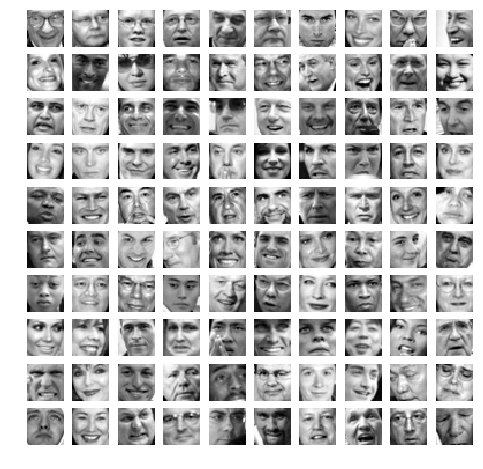

In [11]:
# Display the first 100 faces
def displayData(images):
    
    n = len(images)
    dm = divmod(n,10)
    
    nrows = np.floor(np.sqrt(n))
    ncols = np.ceil(n / nrows)
    
    
    fig = plt.figure(figsize=(8, 8))

    for i in range(n):
        sub = fig.add_subplot(nrows, ncols, i + 1)
        sub.axis('off')
        sub.imshow(images[i].reshape(32,32).T,cmap='gray')
    
    return fig

fig = displayData(X[:100,:])

### Part 5: PCA on Face Data: Eigenfaces
Run PCA and visualize the eigenvectors which are in this case eigenfaces<br>
We display the first 36 eigenfaces.

In [12]:
# Before running PCA, it is important to first normalize X
mu = np.mean(X, axis = 0)
sigma = np.std(X, axis = 0)
X_norm = (X - mu) / sigma

In [13]:
# Run pca

# Compute covariance matrix (biased estimator )
covMat = np.cov(X_norm.T, bias=True)

# Compute eignevectors and eigenvalues (U = eigenvectors, V = eigenvalues)
(U, S, _) = svd(covMat)

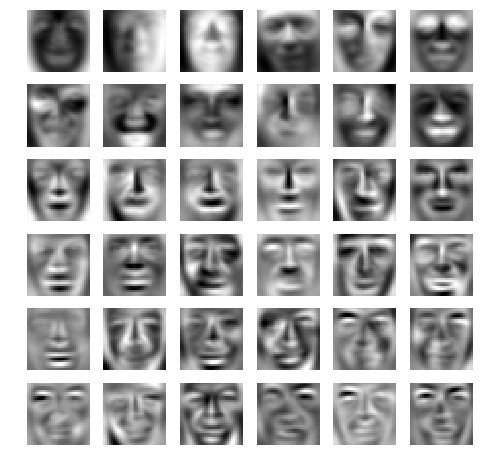

In [14]:
# Visualize the top 36 eignevectors
fig = displayData(U[:,:36].T)

### Part 6: Dimension Reduction for Faces
Project images to the eigen space using the top k eigenvectors 

In [15]:
k = 100
Z = projectData(X_norm, U, k)
print('The projected data Z has a size of : {}'.format(Z.shape))

The projected data Z has a size of : (5000, 100)


### Part 7: Visualization of Faces after PCA Dimension Reduction
Project images to the eigen space using the top K eigen vectors and visualize only using those K dimensions.

In [16]:
k = 100
X_rec = recoverData(Z, U, k)

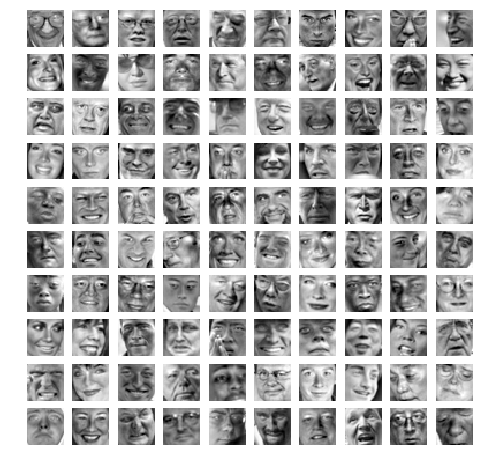

In [17]:
# Display normalized data
fig = displayData(X_norm[:100,:])


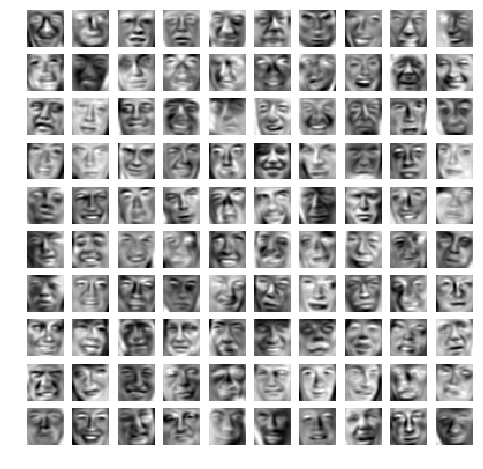

In [18]:
# Display reconstructed data from only k eigenfaces
fig = displayData(X_rec[:100,:])

### Part 8(a): Optional (ungraded) Exercise: PCA for Visualization
One useful application of PCA is to use it to visualize high-dimensional data.<br>
In the last K-Means exercise you ran K-Means on 3-dimensional pixel colors of an image.<br>
We first visualize this output in 3D, and then apply PCA to obtain a visualization in 2D.

In [19]:
A = imread('bird_small.png')
A = A / 255 # Divide by 255 so that all values are in the range 0 - 1
img_size = A.shape

####  Reshape the image into an Nx3 matrix where N = number of pixels.
Each row will contain the Red, Green and Blue pixel values <br> This gives us our dataset matrix X that we will use K-Means on.

In [20]:
X = A.reshape(img_size[0]*img_size[1], 3)
# The shape is now (nb of pixels * 3 )
X.shape

(16384, 3)

#### Run K-means

In [21]:
K = 16 # Number of clusters / centroids
max_iters = 10

# run k means using k-means++ initialization (instead of random) whcih speeds up convergence
kmeans = KMeans(n_clusters=K, init ='k-means++' , max_iter = max_iters).fit(X)

In [22]:
# Centroid asscoiated to each sample
idx, _ = pairwise_distances_argmin_min(X, kmeans.cluster_centers_)

In [23]:
# Sample 1000 random indexes (since working with all the data is too expensive. If you have a fast computer, you may increase this.
sel = np.floor(np.random.rand(1000,1) * X.shape[0])
sel = sel.astype(int)

# Retrieve a sample subset
X_sel = X[sel].reshape(-1,3)
idx_sel = idx[sel].reshape(sel.size)


In [24]:
# setup color palette
palette = cm.rainbow(np.linspace(0, 1, K))

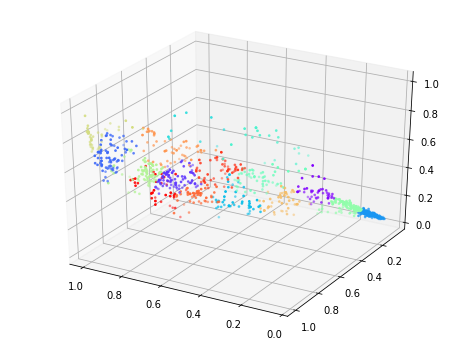

In [25]:
# Plot sample 
fig = plt.figure(figsize= (8,6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 120)

for cluster in range(K):
    color = palette[cluster,:]
    ax.scatter(X_sel[idx_sel == cluster, 0], X_sel[idx_sel == cluster, 1], X_sel[idx_sel == cluster, 2], c=color, s = 3)

### Part 8(b): PCA for Visualization
Use PCA to project this cloud to 2D for visualization

In [26]:
# Normalize features
mu = np.mean(X, axis = 0)
sigma = np.std(X, axis = 0)
X_norm = (X - mu) / sigma

In [27]:
# PCA and project to 2D
covMat = np.cov(X_norm.T, bias=True)
(U, S, _) = svd(covMat)
Z = projectData(X_norm, U, 2)
Z_sel = Z[sel].reshape(sel.size,2)

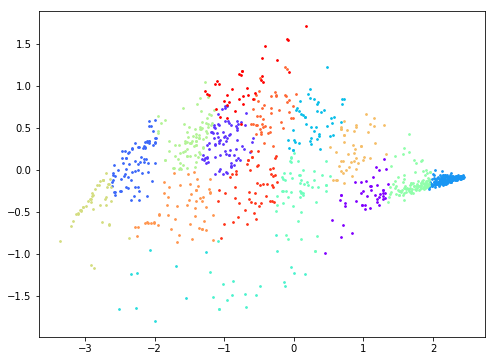

In [28]:
# Plot in 2D
fig = plt.figure(figsize= (8,6))
ax = fig.add_subplot(111)

for cluster in range(K):
    color = palette[cluster,:]
    ax.scatter(Z_sel[idx_sel == cluster, 0], Z_sel[idx_sel == cluster, 1], c=color, s = 3)


## END